In [53]:
%run "All_helper_classes.ipynb" sort=False

#from "Models training helpers.ipynb" we will import 3 helper classes and the associated helper methods.
parsing_helpers = generic_parsing_helpers()
aivm_helper = AIVM_helper()
model_helpers, info = default_model_helpers_for_project()
#if you want to see the paths now can call with...
display (HTML(info))

paths = project_paths()

#same for paths and repo data, display using...
display (HTML(paths.get_paths_data()))
display (HTML(paths.get_repo_data()))



Necessary libraries imported.
Initialised generic_parsing_helpers class and methods
Initialised AIVM_helper class and methods
Initialised model_helpers class and methods


In [116]:
%%javascript
//To remove scroll from any output area and automatically extend the jupyter cell
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
# visualization imports
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
import io
sns.set() 
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score, auc, precision_score, roc_curve, confusion_matrix, classification_report
import tqdm
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression


In [29]:
#Read the combined original training data and audited data file from "training_ALL.tsv"
#Note this method already calls "remove_line_breaks"
USE_GIT_HUB = True

print (paths.TRAINING_DATA_ALL_DIR_FILE_GIT)
print (paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL)

#Note this method already calls "remove_line_breaks"
training_df = model_helpers.get_training_data(
                            USE_GIT_HUB,
                            paths.TRAINING_DATA_ALL_DIR_FILE_GIT,
                            paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL, 
                            paths.GIT_OWNER,
                            paths.GIT_REPO)

https://raw.githubusercontent.com/aideenf/AIVC/master/cp_wssc/Data/Iterative-models-building/Training%20data/Conventions/training_ALL.tsv
Data/Iterative-models-building/Training data/Conventions/training_ALL.tsv
Initialised generic_parsing_helpers class and methods


In [30]:
training_df.head()

,label,text,provenance,convention
0,1,+ This is an easter egg concerned with the com...,Manually_gathered,civic
1,1,Additionally you can modify SAM to integrate i...,Manually_gathered,civic
2,1,Chrome has the largest share of global usage a...,Manually_gathered,civic
3,1,Kivy is MIT licensed actively developed by a g...,Manually_gathered,civic
4,1,Thanks to our great community we\'ve finally r...,Manually_gathered,civic


In [35]:
#Note this method already processes the gathered data and reads either from local or directly from git.
gathered_conventions_files, gathered_conventions_df = model_helpers.get_aggregated_gathered_data (
                            USE_GIT_HUB,
                            paths.GATHERED_DATA_CONV_DIR_GIT,
                            paths.GATHERED_DATA_CONV_DIR_LOCAL,
                            paths.GITHUB_GATHERED_URL_PATH, 
                            paths.GIT_OWNER,
                            paths.GIT_REPO)


Initialised AIVM_helper class and methods


In [36]:
display (gathered_conventions_df.head(5))

,text,provenance
0,react can also render on the server using node...,Github
1,b open source society university path to a fre...,Github
2,the curriculum is designed as follows - intro ...,Github
3,all or nearly all course material prior to pro...,Github
4,"please check our frequently asked questions, a...",Github


In [38]:
column_to_tokenize = 'text'
gathered_and_training = pd.DataFrame(gathered_conventions_df[column_to_tokenize].append(training_df[column_to_tokenize]))##Adding training data sentences
extended_tokenizer = parsing_helpers.create_tokenizer(gathered_and_training, 
                                                        column_to_tokenize,
                                                        max_words=model_helpers.MAX_NB_WORDS)

display (type (extended_tokenizer))

keras_preprocessing.text.Tokenizer

In [39]:
## Vocabulary loading
def _read_glove_embeddings(glove_dir, embedding_dim):
    ## Reading GLOVE (precalculated word embeddings)
    embeddings_index = {}
    f = open(os.path.join(glove_dir, 'glove.6B.{}d.txt'.format(embedding_dim)))
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

    return embeddings_index

In [43]:
embeddings_index =_read_glove_embeddings(glove_dir=paths.GLOVE_DIR_LOCAL, embedding_dim=model_helpers.EMBEDDING_DIM)

In [54]:
## Train DL models
"""
N=1
models = []
for i in range(N):
    result = model_helpers.train_DL_models(training_df,
                data_class_column="convention", 
                data_label_column="label",
                tokenizer=extended_tokenizer,
                random_seed=0,
                use_validation=True) 
    models.append(result)
    
"""

_DLModels, _DLTokenizers, _DLData_val_x, _DLData_val_y, _DLTrain_histories = model_helpers.train_DL_models(training_df,
                data_class_column="convention", 
                data_label_column="label",
                tokenizer=extended_tokenizer,
                random_seed=0,
                use_validation=True) 
                


Found 83027 unique tokens.
----------------------------------------------------------------
            civic                  
----------------------------------------------------------------
Shape of data tensor: (456, 32)
Shape of label tensor: (456, 2)

Number of elements from each class in traing and validation set 
[181. 184.]
[47. 44.]


/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 32, 100)      8302800     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 30, 128)      38528       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 29, 128)      51328       embedding_1[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 32, 100)      8302800     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 30, 128)      38528       embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 29, 128)      51328       embedding_2[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 32, 100)      8302800     input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 30, 128)      38528       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 29, 128)      51328       embedding_3[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 32, 100)      8302800     input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 30, 128)      38528       embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 29, 128)      51328       embedding_4[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 32, 100)      8302800     input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 30, 128)      38528       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 29, 128)      51328       embedding_5[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 32, 100)      8302800     input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, 30, 128)      38528       embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 29, 128)      51328       embedding_6[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 32, 100)      8302800     input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 30, 128)      38528       embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_26 (Conv1D)              (None, 29, 128)      51328       embedding_7[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 32, 100)      8302800     input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 30, 128)      38528       embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_30 (Conv1D)              (None, 29, 128)      51328       embedding_8[0][0]                
__________________________________

# Calibration
Now we have our simple multi-label "Binary Relevance(BR)" classifier ie  one binary classifier for each of our 8 labels
and can take the product of the individual label probabilities as the overall label-set probability (confidence).
( known drawbacks are generating suboptimal predictions and poorly calibrated confidence scores however
 BR is widely used in practice due to its speed and simplicit). The simplest approach to multi-label classification 
is to apply one binary classifier to predict each label separately. This approach is called binary relevance (BR)
[ Tsoumakas, G., Katakis, I.: Multi-label classification: An overview. Int J Data
Warehousing and Mining 2007, 1–13 (2007)] and is widely used due to its simplicity and speed. 
"BR has two well-known drawbacks. First, BR neglects label dependencies and this often leads to prediction errors: some BR predictions are incomplete,
such as tagging cat but not animal for an image, and some are conflicting, such as predicting both the code 
Pain in left knee and the code Pain in unspecified knee for a medical note." 
In our case there are no label dependencies so this drawback is not an issue.

Calibration:

A probabilistic model is calibrated if I binned the test samples based on their predicted probabilities and 
each bin’s true outcomes has a proportion close to the probabilities in the bin. for example if we split into 
10 bins 0 to .1 .1 to .2 .... .8 to 1 then in the .8 bin 80% of the predictions should 
in theory be correct as this would basically imply an 80% confidence rating. this can be reflected 
in a reliability diagram(or calibration plot). Well calibrated classifiers are probabilistic classifiers 
for which the output of the predict_proba method can be directly interpreted as a confidence level. 
For instance, a well calibrated (binary) classifier should classify the samples such that among the 
samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to 
the positive class.

"At this point the overall system is predicting  the probability that a sentence belonging 
to each of the eight conventions.  In general, the distribution of these probabilities may 
not match the expected distribution of observed probabilities in the training data. 
The distribution of the probabilities is therefor calibrated(or adjusted) to better match 
the expected distribution observed in the data. This adjustment is a rescaling operation 
applied after the predictions have been made by the models. This calibration or scaling
can be achieved by using for example, Platt Scaling or Isotonic Regression.

Diagnose: by creating a reliability diagram( calibration curve) of the actual probabilities
versus the predicted probabilities on a test set."

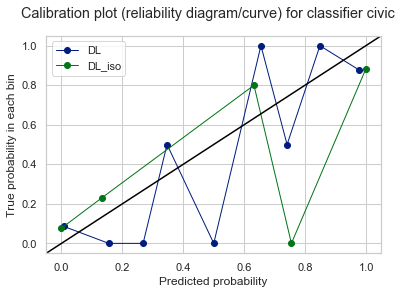

<Figure size 432x288 with 0 Axes>

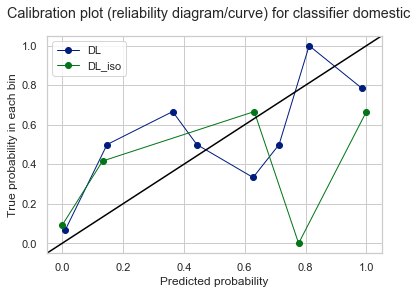

<Figure size 432x288 with 0 Axes>

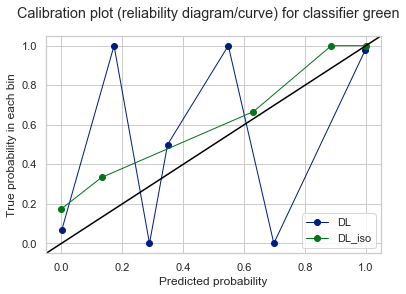

<Figure size 432x288 with 0 Axes>

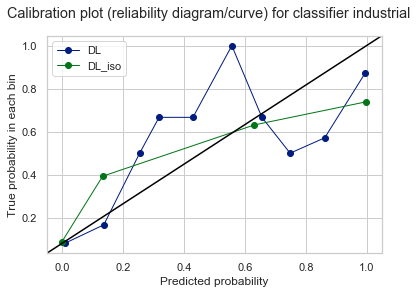

<Figure size 432x288 with 0 Axes>

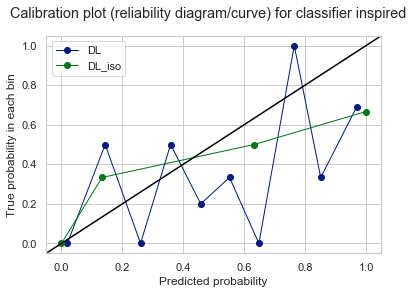

<Figure size 432x288 with 0 Axes>

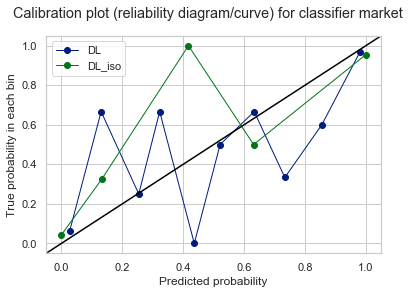

<Figure size 432x288 with 0 Axes>

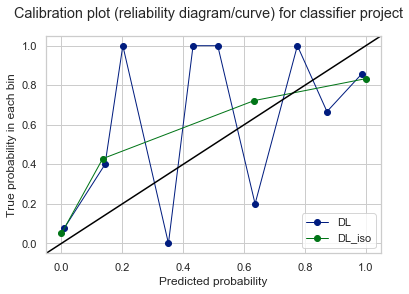

<Figure size 432x288 with 0 Axes>

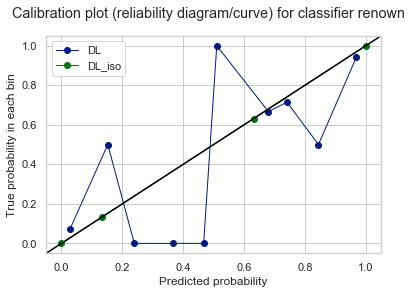

<Figure size 432x288 with 0 Axes>

In [548]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression
isotonicRegressionCalibration = IsotonicRegression()
for convention in _DLModels.keys():

    #get the model, the validation data input(my_data_x) and the predicted label(preds) to compare to the actual label(my_data_y).
    model = _DLModels[convention]
    data_x = _DLData_val_x[convention]
    y_actual = [int(x[0]<x[1]) for x in _DLData_val_y[convention]]
    y_predict = model.predict(data_x)
    y_predict = get_positive_preds_probabilities(model.predict(data_x))

    isotonicRegressionCalibration.fit(y_predict, y_actual)
    y_predict_isotonic = ir.predict(y_predict)
    
    #Plot the calibration curves for test data which is not callibrated and test data which is callibrated
    y, x = calibration_curve(y_actual, y_predict, n_bins=10)
    y_iso, x_iso = calibration_curve(y_actual, y_predict_isotonic, n_bins=10)
  

    fig, ax = plt.subplots()
    # only these two lines are calibration curves
    plt.plot(x, y, marker='o', linewidth=1, label='DL')
    plt.plot(x_iso, y_iso, marker='o', linewidth=1, label='DL_iso')

    # reference line, legends, and axis labels
    line = mlines.Line2D([0, 1], [0, 1], color='black')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    fig.suptitle('Calibration plot (reliability diagram/curve) for classifier ' + convention)
    ax.set_xlabel('Predicted probability')
    ax.set_ylabel('True probability in each bin')
    plt.legend()
    plt.show()
    plt.clf()

# Metrics

Note in terms of the overall system: The EC identification is an imbalanced classification problem: we have 8 labels we need to identify — with one or two labels(industrial, project) representing the overwhelming majority of the data points in our real world "gathered data", i.e the rate of some of the conventions in our real world "gathered data" will be very low, we will need to consider this later when we are setting the probability/classification thresholds with consideration for the overall system, Not just each individual classifier.

What is the treshold? Each of our models will return the Probability of a sentence belonging to the convention represented by the model. Now this probability needs to be turned into a Classification.
    - Belongs to the convention (Class 1)
    - Does not belong to the convention (Class 0)

we could say that this classification should occur at probability 0.5 however this may not be the best place to put it and for performance of our overall system this "threshold" may vary per model. We will therefor evaluate each individual models performance for a number of performance matrics, for a selection of different classification thresholds, in order to ultimately determine what Threshold  per model to use on unseen data once the model is live.


First we should review metrics for each individual model. In this case our training and evaluation data for each model is very balanced, in that we have an equal amount of Class 1 and Class 0 training sets per model. This balance has been achieved by data resampling either under-sampling the majority of the class, or over-sampling the minority class, or a mix of both(depending on which of the 8 models is in question). This is something to consider when ultimitely deciding the metric to base our threshold decisions on per model (but we should also keep in mind the overall system and the distribution of conventions in unseen(real world) data. 

The Metrics to evaluate:
    * Where Class 1 = Sentence belongs to Convention
    * Where Class 0 = Sentence does not belongs to Convention
 We evaluate against against a gold standard (or the ‘ground truth’ as it is perceived) i.e the true values v's the models predicted valuse in our test/validation data set. 

//////////////////////////////////////////*ACCURACY*/////////////////////////////////////////////////////////////

    - Accuracy = (TP + TN)/(TP + FP + TN + FN)

The probability that the classification result is correct, ie probability of correctly labeling sentences as class 1 or Class 0, given all the sentences!

Accuracy is simply the ratio of the correctly labeled sentences out of all sentences. Accuracy is a good measure  for well balanced datasets and when false negatives & false positive predictions have a similar 'costs'.

With imbalanced data, for example containing a lower amount of Class 1 compared to Class 0,  proclaiming all sentences as class 0 will have quite a high accuracy due to the low overall presence of Class 1, this may not ultimately be a helpful metric though if the cost of a false negative(false class 0) has a high cost. In the case of each of our individual models, our training data is quite balanced and there is a similar cost for FP and FN. however we need to keep in mind that the overall distribution of data in our overall system is not so evenly distributed across the labels that each model represents. 


////////////////////////////*PRECISION/POSITIVE PREDICTION VALUE*//////////////////////////////////////////////

     - Precision or Positive prediction value =  TP / (TP + FP)
     
The probability that a sentences we have labeled as Class 1(belonging to the convention) is actually Class 1. eg in green model, the probability that a sentenced classified as positive(1) for green, is actually green. 

Our focus then in terms of performance might be on identifying the actually positive cases, i.e to maximize the "precision".  Although a model with umbalanced data could also 'cheat' and maximize this by always returning “negative”. This metric is important if the most important function of the model will be to identify positives (Class 1). If this is a priority then we should choose a model with higher Recall/Sensitivity. 

   
//////////////////////////////*RECALL/SENSITIVITY/TRUE POSITIVE RATE*/////////////////////////////////////////
 
     - Recall or Sensitivity or TPR =  TP / (TP + FN)
     
Given the sentence is part of the convention, how likely is it that the classification will be positive?

Our focus then in terms of performance could maybe be in terms of higher importance on identifying the positive cases, i.e to maximize the "recall" or "sensitivity". Although a model could also 'cheat' and maximize this by always returning “positive”. This metric is important if the most important function of the model will be to identify positives (Class 1). If this is most important to us then we should choose a model with higher Recall/Sensitivity. 

//////////////////////////////*SPECIFITY/TRUE NEGATIVE RATE*//////////////////////////////////////////////////   

    - Specifity or TNR = TN / (TN + FP)

How good a classifier is at avoiding false alarms. Given the sentence does not belong to the convention, how likely is it that the classification will be negative(class 0). If correctly identifying negatives is most important, then we should choose specificity as the measurement metric. A classifier can 'cheat' and maximize this by always returning “negative”/Class 0.


///////////////////////////////////////*F1 SCORE*/////////////////////////////////////////////////////////

    - F1 =  2 * ( (Precision * Recall) / (Precision + Recall) )
If we want to find an optimal blend of precision and recall we can combine the two metrics using what is called the F1 score, this is the 'harmonic mean' of precision and recall (harmonic mean is used as it punishes extreme values)

Note there are other F measures,  eg F2 which weights recall higher than precision, and F0.5 which puts more emphasis on precision than recall.
Fx = (1 + x^2) * ( (precision * recall) / (x^2 *(Precision + Recall)) 
///////////////////////////////////////////////////////////////////////////////////////////////////////////   

It is importalt to look at all relevant metrics instead of just one and to make a decision based on the problem to be resolved (the purpose of the classifier and the importance/impact of incorrectly classifying as positive vs' incorrectly classifying as negative for example it is worse to falsely imprison an innocent person than to let a guilty criminal get away, however the cost attached to FP's and FN'S in our sentence classification is of a different nature. 

    -ROC Curves summarize the trade-off between the true positive rate(recall) and false positive rate for a predictive model. AUC exists independently of a threshold, whereas accuracy / precision / recall / F1-score DO require the picking of a threshold, so we are measuring two different things.

    -Precision-Recall curves summarize the trade-off between the recall(true positive rate) and the Precision(positive predictive value) for a predictive model using different probability thresholds.

Note: ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

In [539]:
def get_positive_preds_with_threshold(preds, threshold=0.5):
    #Keras .predict returns a list of [x, y] values where x = probability of 0 and y is probability of 1
    #ie 
    preds_results = []
    for j in range(len(preds)):
        int_pred = int(preds[j][1]>=threshold)
        preds_results.append(int_pred)
    return preds_results

def get_positive_preds_probabilities(preds):
    #Keras .predict returns a list of [x, y] values where x = probability of 0 and y is probability of 1
    #i.e preds[j][1] is the probability of a positive prediction.
    preds_results = []
    for j in range(len(preds)):
        int_pred = preds[j][1]
        preds_results.append(int_pred)
    return preds_results

def apply_pred_threshold(preds, t):
    res = np.zeros(len(preds))  
    res[preds>=t] = 1
    return res

def calculate_metrics(results, num_samples, model):
    
    results.insert(0,'index', range(0,results.shape[0]))
    metrics_df = pd.DataFrame(index = results['index'], columns=['model','threshold','accuracy', 'precision_ppv', 'recall_sensitivity_tpr', 'f1', 'specifity_selectivity_tnr', 'tpr', 'fpr'])

    for i in results.iterrows():
        
        index, threshold, tp, fp, tn, fn = i[1]

        assert tp + fp + tn + fn == num_samples 
        
        recall = tp / (tp + fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        
        else:
            precision = tp / (tp + fp)
            true_positive_rate = tp / (tp + fn)
            
        if precision == recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        
        false_positive_rate = fp / (fp + tn)
        
        accuracy = (tp+tn)/(tp + fp + tn + fn)
        specifity = tn / (tn + fp)
        
        metrics_df.loc[index, 'model'] = model
        metrics_df.loc[index, 'accuracy'] = accuracy
        metrics_df.loc[index, 'precision_ppv'] = precision
        metrics_df.loc[index, 'recall_sensitivity_tpr'] = recall
        metrics_df.loc[index, 'f1'] = f1
        metrics_df.loc[index, 'specifity_selectivity_tnr'] = specifity
        metrics_df.loc[index, 'tpr'] = true_positive_rate
        metrics_df.loc[index, 'fpr'] = false_positive_rate  #inverse recall    
    metrics_df.reset_index()
    metrics_df = pd.concat([results, metrics_df.drop("threshold", axis=1)],axis=1, join='inner', sort = False)
    metrics_df = metrics_df.drop("index", axis=1)
    
    #set the model name to col 0 for consistency
    model = metrics_df.pop('model')
    metrics_df.insert(0, 'model', model)
    return metrics_df


def calculate_final_models_metrics(results):
    metrics_df = pd.DataFrame(index = results['index'], columns=['convention', 'accuracy', 'precision_ppv', 'recall_sensitivity_tpr', 'f1', 'specifity_selectivity_tnr', 'tpr', 'fpr'])

    for i in results.iterrows():
        index, convention, tp, fp, tn, fn, auc = i[1]  

        recall = tp / (tp + fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        
        else:
            precision = tp / (tp + fp)
            true_positive_rate = tp / (tp + fn)
            
        if precision == recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        
        false_positive_rate = fp / (fp + tn)
        
        accuracy = (tp+tn)/(tp + fp + tn + fn)
        specifity = tn / (tn + fp)

        metrics_df.loc[index, 'convention'] = convention
        metrics_df.loc[index, 'accuracy'] = accuracy
        metrics_df.loc[index, 'precision_ppv'] = precision
        metrics_df.loc[index, 'recall_sensitivity_tpr'] = recall
        metrics_df.loc[index, 'f1'] = f1
        metrics_df.loc[index, 'specifity_selectivity_tnr'] = specifity
        metrics_df.loc[index, 'tpr'] = true_positive_rate
        metrics_df.loc[index, 'fpr'] = false_positive_rate  #inverse recall  


    
    metrics_df = pd.concat([results, metrics_df.drop("convention", axis=1)],axis=1, join='inner', sort = False)

    return metrics_df


    

Metrics for civic per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,specifity_selectivity_tnr,tpr,fpr
0,civic,0.0,44,47,0,0,0.483516,0.483516,1,0.651852,0,1,1
1,civic,0.1,41,15,32,3,0.802198,0.732143,0.931818,0.82,0.680851,0.931818,0.319149
2,civic,0.2,41,12,35,3,0.835165,0.773585,0.931818,0.845361,0.744681,0.931818,0.255319
3,civic,0.3,41,10,37,3,0.857143,0.803922,0.931818,0.863158,0.787234,0.931818,0.212766
4,civic,0.4,38,7,40,6,0.857143,0.844444,0.863636,0.853933,0.851064,0.863636,0.148936
5,civic,0.5,38,6,41,6,0.868132,0.863636,0.863636,0.863636,0.87234,0.863636,0.12766
6,civic,0.6,38,6,41,6,0.868132,0.863636,0.863636,0.863636,0.87234,0.863636,0.12766
7,civic,0.7,36,6,41,8,0.846154,0.857143,0.818182,0.837209,0.87234,0.818182,0.12766
8,civic,0.8,34,4,43,10,0.846154,0.894737,0.772727,0.829268,0.914894,0.772727,0.0851064
9,civic,0.9,29,4,43,15,0.791209,0.878788,0.659091,0.753247,0.914894,0.659091,0.0851064


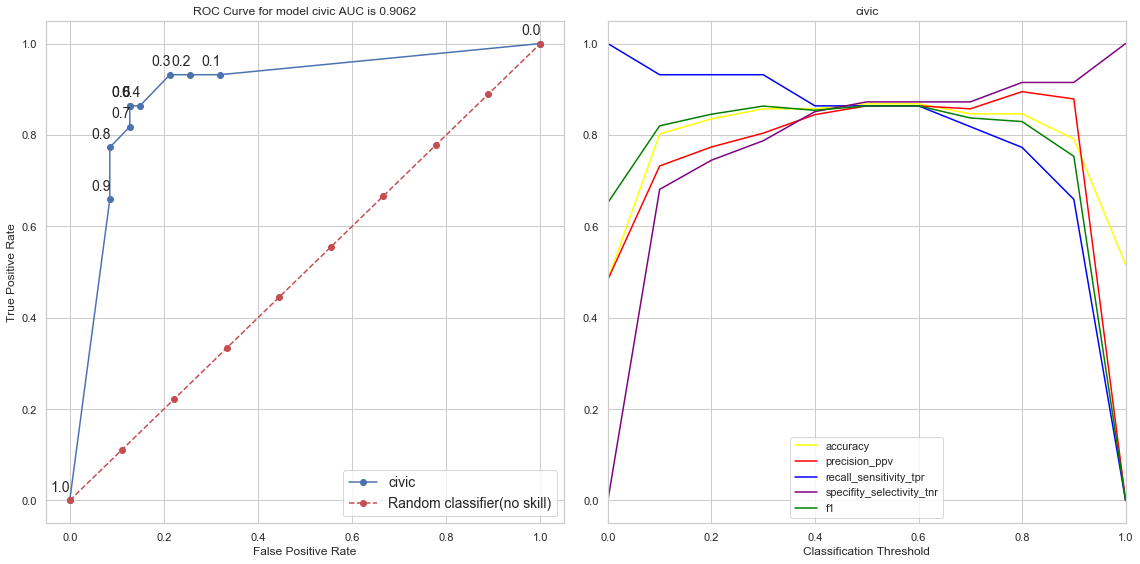

The best of each evaluation metric for model civic
* Precision:  0.8947368421052632 at threshold  0.8
* Recall:  1.0 at threshold  0.0
* F1:  0.8636363636363636 at threshold  0.5



Metrics for domestic per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,specifity_selectivity_tnr,tpr,fpr
0,domestic,0.0,33,39,0,0,0.458333,0.458333,1,0.628571,0,1,1
1,domestic,0.1,31,12,27,2,0.805556,0.72093,0.939394,0.815789,0.692308,0.939394,0.307692
2,domestic,0.2,30,11,28,3,0.805556,0.731707,0.909091,0.810811,0.717949,0.909091,0.282051
3,domestic,0.3,30,11,28,3,0.805556,0.731707,0.909091,0.810811,0.717949,0.909091,0.282051
4,domestic,0.4,28,10,29,5,0.791667,0.736842,0.848485,0.788732,0.74359,0.848485,0.25641
5,domestic,0.5,27,9,30,6,0.791667,0.75,0.818182,0.782609,0.769231,0.818182,0.230769
6,domestic,0.6,27,9,30,6,0.791667,0.75,0.818182,0.782609,0.769231,0.818182,0.230769
7,domestic,0.7,26,7,32,7,0.805556,0.787879,0.787879,0.787879,0.820513,0.787879,0.179487
8,domestic,0.8,25,6,33,8,0.805556,0.806452,0.757576,0.78125,0.846154,0.757576,0.153846
9,domestic,0.9,22,6,33,11,0.763889,0.785714,0.666667,0.721311,0.846154,0.666667,0.153846


<Figure size 432x288 with 0 Axes>

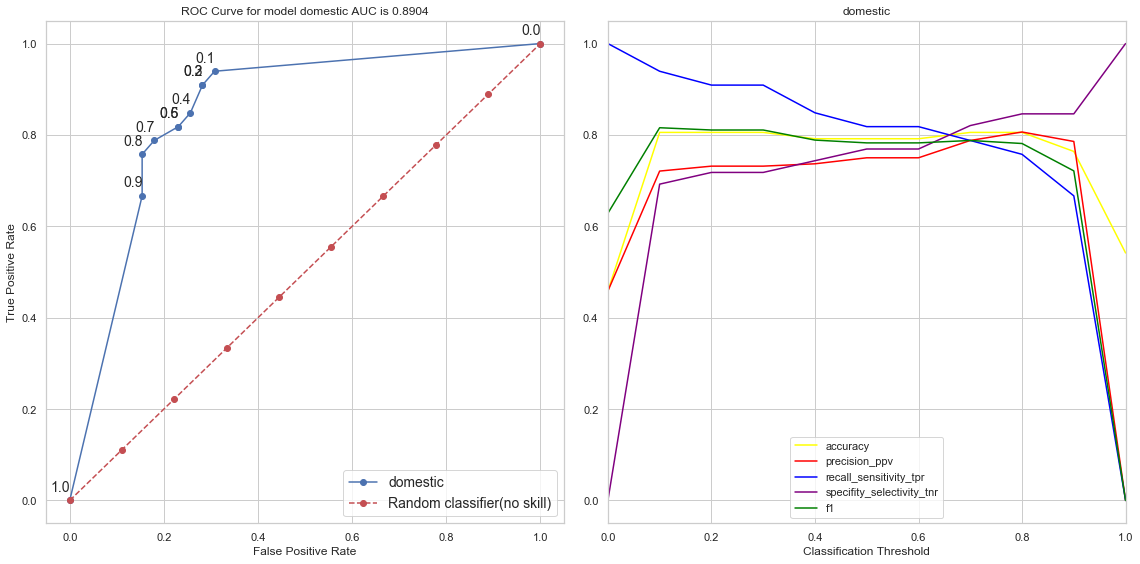

The best of each evaluation metric for model domestic
* Precision:  0.8064516129032258 at threshold  0.8
* Recall:  1.0 at threshold  0.0
* F1:  0.8157894736842105 at threshold  0.1



Metrics for green per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,specifity_selectivity_tnr,tpr,fpr
0,green,0.0,159,154,0,0,0.507987,0.507987,1,0.673729,0,1,1
1,green,0.1,148,6,148,11,0.945687,0.961039,0.930818,0.945687,0.961039,0.930818,0.038961
2,green,0.2,147,6,148,12,0.942492,0.960784,0.924528,0.942308,0.961039,0.924528,0.038961
3,green,0.3,147,5,149,12,0.945687,0.967105,0.924528,0.945338,0.967532,0.924528,0.0324675
4,green,0.4,146,4,150,13,0.945687,0.973333,0.918239,0.944984,0.974026,0.918239,0.025974
5,green,0.5,146,4,150,13,0.945687,0.973333,0.918239,0.944984,0.974026,0.918239,0.025974
6,green,0.6,145,4,150,14,0.942492,0.973154,0.91195,0.941558,0.974026,0.91195,0.025974
7,green,0.7,145,3,151,14,0.945687,0.97973,0.91195,0.944625,0.980519,0.91195,0.0194805
8,green,0.8,145,3,151,14,0.945687,0.97973,0.91195,0.944625,0.980519,0.91195,0.0194805
9,green,0.9,145,3,151,14,0.945687,0.97973,0.91195,0.944625,0.980519,0.91195,0.0194805


<Figure size 432x288 with 0 Axes>

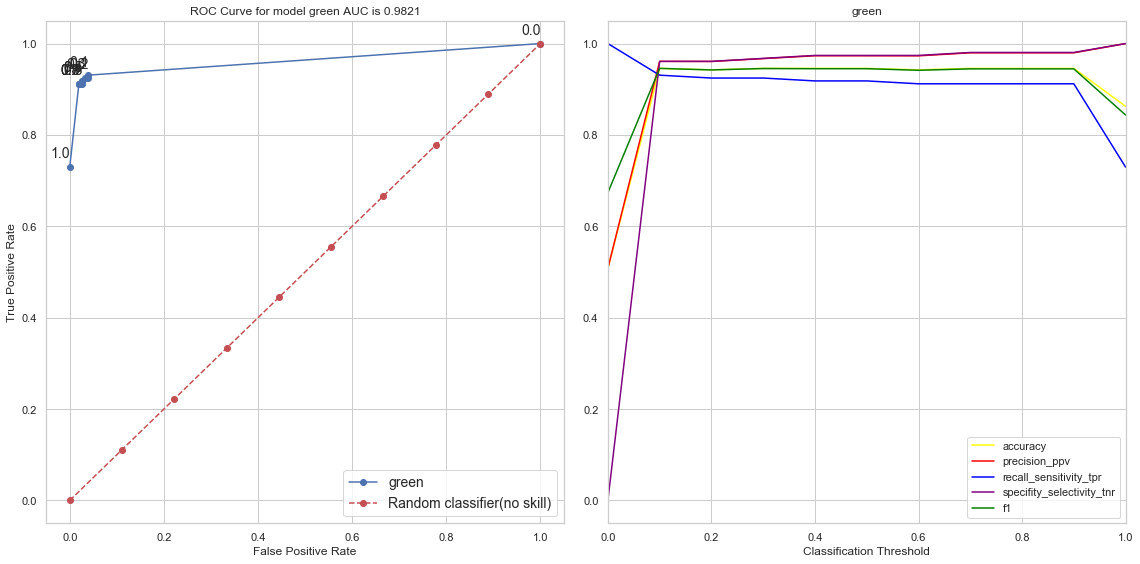

The best of each evaluation metric for model green
* Precision:  1.0 at threshold  1.0
* Recall:  1.0 at threshold  0.0
* F1:  0.9456869009584665 at threshold  0.1



Metrics for industrial per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,specifity_selectivity_tnr,tpr,fpr
0,industrial,0.0,125,134,0,0,0.482625,0.482625,1,0.651042,0,1,1
1,industrial,0.1,116,31,103,9,0.84556,0.789116,0.928,0.852941,0.768657,0.928,0.231343
2,industrial,0.2,115,26,108,10,0.861004,0.815603,0.92,0.864662,0.80597,0.92,0.19403
3,industrial,0.3,112,23,111,13,0.861004,0.82963,0.896,0.861538,0.828358,0.896,0.171642
4,industrial,0.4,110,22,112,15,0.857143,0.833333,0.88,0.856031,0.835821,0.88,0.164179
5,industrial,0.5,108,21,113,17,0.853282,0.837209,0.864,0.850394,0.843284,0.864,0.156716
6,industrial,0.6,106,21,113,19,0.84556,0.834646,0.848,0.84127,0.843284,0.848,0.156716
7,industrial,0.7,104,20,114,21,0.841699,0.83871,0.832,0.835341,0.850746,0.832,0.149254
8,industrial,0.8,101,17,117,24,0.841699,0.855932,0.808,0.831276,0.873134,0.808,0.126866
9,industrial,0.9,97,14,120,28,0.837838,0.873874,0.776,0.822034,0.895522,0.776,0.104478


<Figure size 432x288 with 0 Axes>

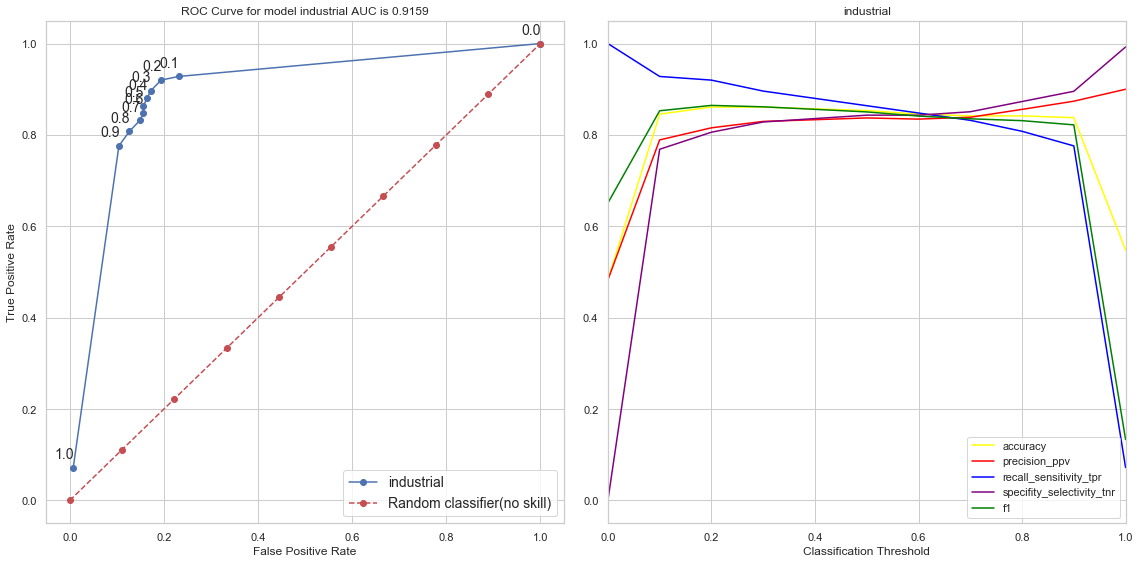

The best of each evaluation metric for model industrial
* Precision:  0.9 at threshold  1.0
* Recall:  1.0 at threshold  0.0
* F1:  0.8646616541353384 at threshold  0.2



Metrics for inspired per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,specifity_selectivity_tnr,tpr,fpr
0,inspired,0.0,29,36,0,0,0.446154,0.446154,1,0.617021,0,1,1
1,inspired,0.1,29,25,11,0,0.615385,0.537037,1,0.698795,0.305556,1,0.694444
2,inspired,0.2,26,22,14,3,0.615385,0.541667,0.896552,0.675325,0.388889,0.896552,0.611111
3,inspired,0.3,26,20,16,3,0.646154,0.565217,0.896552,0.693333,0.444444,0.896552,0.555556
4,inspired,0.4,23,17,19,6,0.646154,0.575,0.793103,0.666667,0.527778,0.793103,0.472222
5,inspired,0.5,22,13,23,7,0.692308,0.628571,0.758621,0.6875,0.638889,0.758621,0.361111
6,inspired,0.6,21,11,25,8,0.707692,0.65625,0.724138,0.688525,0.694444,0.724138,0.305556
7,inspired,0.7,21,10,26,8,0.723077,0.677419,0.724138,0.7,0.722222,0.724138,0.277778
8,inspired,0.8,19,10,26,10,0.692308,0.655172,0.655172,0.655172,0.722222,0.655172,0.277778
9,inspired,0.9,18,8,28,11,0.707692,0.692308,0.62069,0.654545,0.777778,0.62069,0.222222


<Figure size 432x288 with 0 Axes>

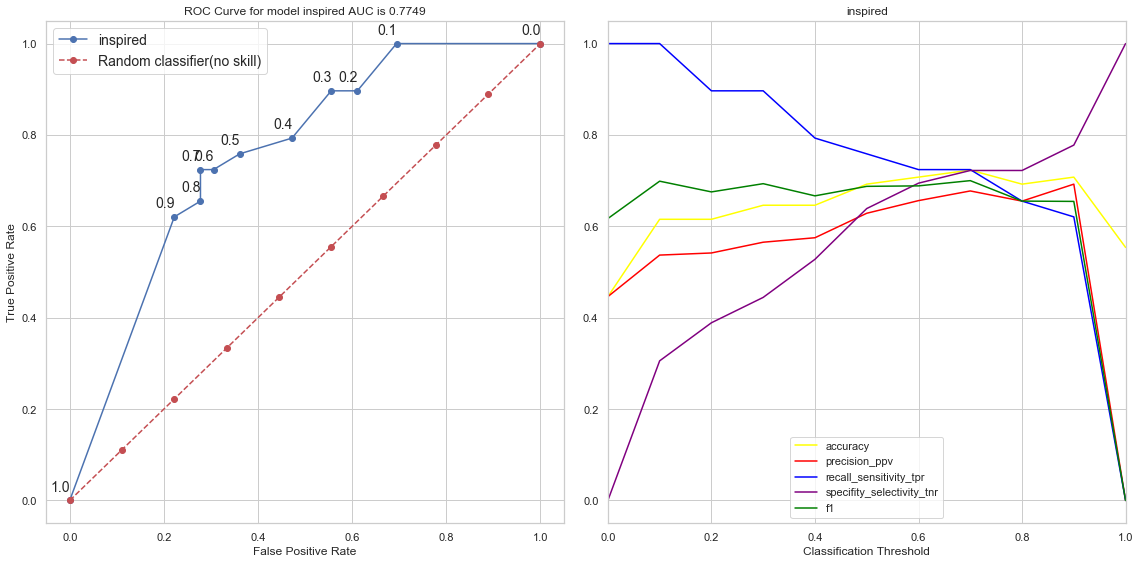

The best of each evaluation metric for model inspired
* Precision:  0.6923076923076923 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.7 at threshold  0.7



Metrics for market per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,specifity_selectivity_tnr,tpr,fpr
0,market,0.0,54,56,0,0,0.490909,0.490909,1,0.658537,0,1,1
1,market,0.1,52,26,30,2,0.745455,0.666667,0.962963,0.787879,0.535714,0.962963,0.464286
2,market,0.2,46,23,33,8,0.718182,0.666667,0.851852,0.747967,0.589286,0.851852,0.410714
3,market,0.3,44,17,39,10,0.754545,0.721311,0.814815,0.765217,0.696429,0.814815,0.303571
4,market,0.4,42,16,40,12,0.745455,0.724138,0.777778,0.75,0.714286,0.777778,0.285714
5,market,0.5,42,10,46,12,0.8,0.807692,0.777778,0.792453,0.821429,0.777778,0.178571
6,market,0.6,40,8,48,14,0.8,0.833333,0.740741,0.784314,0.857143,0.740741,0.142857
7,market,0.7,38,7,49,16,0.790909,0.844444,0.703704,0.767677,0.875,0.703704,0.125
8,market,0.8,36,3,53,18,0.809091,0.923077,0.666667,0.774194,0.946429,0.666667,0.0535714
9,market,0.9,33,1,55,21,0.8,0.970588,0.611111,0.75,0.982143,0.611111,0.0178571


<Figure size 432x288 with 0 Axes>

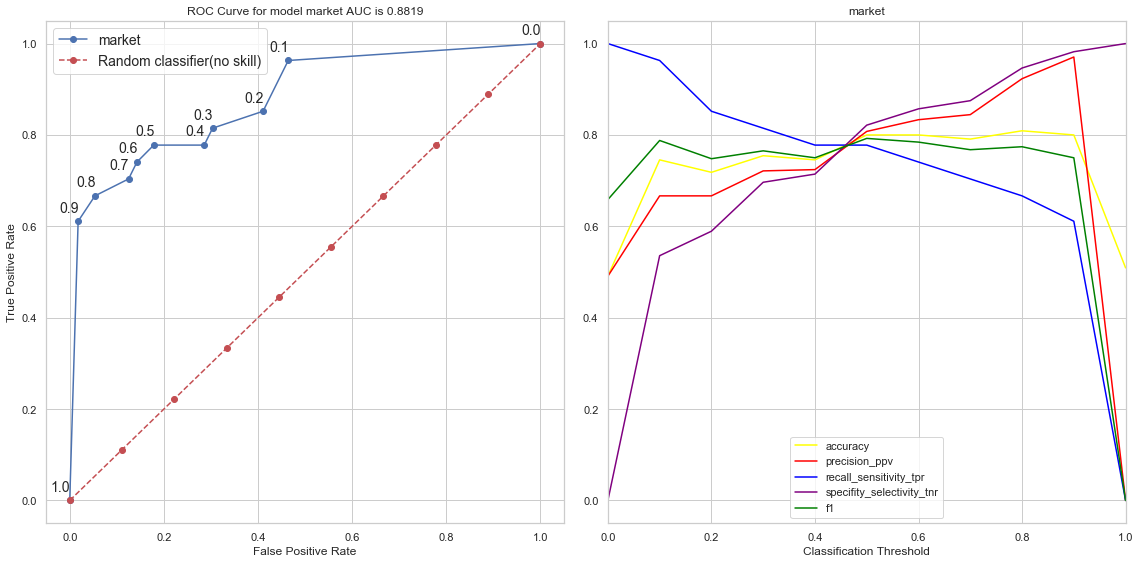

The best of each evaluation metric for model market
* Precision:  0.9705882352941176 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.7924528301886792 at threshold  0.5



Metrics for project per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,specifity_selectivity_tnr,tpr,fpr
0,project,0.0,70,56,0,0,0.555556,0.555556,1,0.714286,0,1,1
1,project,0.1,67,20,36,3,0.81746,0.770115,0.957143,0.853503,0.642857,0.957143,0.357143
2,project,0.2,65,17,39,5,0.825397,0.792683,0.928571,0.855263,0.696429,0.928571,0.303571
3,project,0.3,64,17,39,6,0.81746,0.790123,0.914286,0.847682,0.696429,0.914286,0.303571
4,project,0.4,64,14,42,6,0.84127,0.820513,0.914286,0.864865,0.75,0.914286,0.25
5,project,0.5,63,14,42,7,0.833333,0.818182,0.9,0.857143,0.75,0.9,0.25
6,project,0.6,60,14,42,10,0.809524,0.810811,0.857143,0.833333,0.75,0.857143,0.25
7,project,0.7,59,10,46,11,0.833333,0.855072,0.842857,0.848921,0.821429,0.842857,0.178571
8,project,0.8,56,10,46,14,0.809524,0.848485,0.8,0.823529,0.821429,0.8,0.178571
9,project,0.9,54,9,47,16,0.801587,0.857143,0.771429,0.81203,0.839286,0.771429,0.160714


<Figure size 432x288 with 0 Axes>

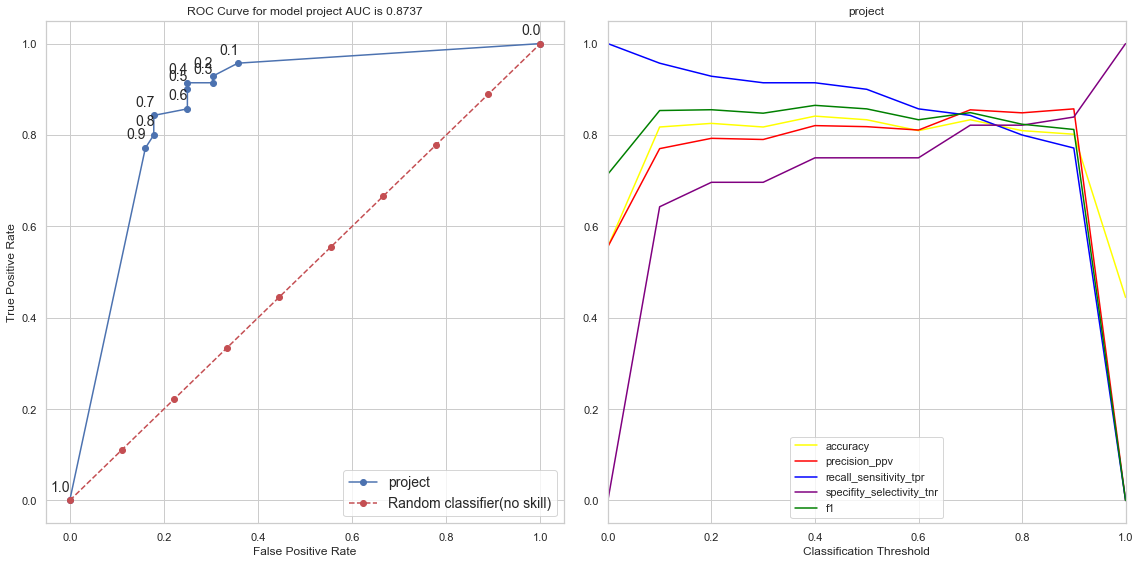

The best of each evaluation metric for model project
* Precision:  0.8571428571428571 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.8648648648648648 at threshold  0.4



Metrics for renown per Classification Threshold


,model,threshold,tp,fp,tn,fn,accuracy,precision_ppv,recall_sensitivity_tpr,f1,specifity_selectivity_tnr,tpr,fpr
0,renown,0.0,29,31,0,0,0.483333,0.483333,1,0.651685,0,1,1
1,renown,0.1,28,18,13,1,0.683333,0.608696,0.965517,0.746667,0.419355,0.965517,0.580645
2,renown,0.2,27,17,14,2,0.683333,0.613636,0.931034,0.739726,0.451613,0.931034,0.548387
3,renown,0.3,27,13,18,2,0.75,0.675,0.931034,0.782609,0.580645,0.931034,0.419355
4,renown,0.4,27,11,20,2,0.783333,0.710526,0.931034,0.80597,0.645161,0.931034,0.354839
5,renown,0.5,27,7,24,2,0.85,0.794118,0.931034,0.857143,0.774194,0.931034,0.225806
6,renown,0.6,26,7,24,3,0.833333,0.787879,0.896552,0.83871,0.774194,0.896552,0.225806
7,renown,0.7,24,6,25,5,0.816667,0.8,0.827586,0.813559,0.806452,0.827586,0.193548
8,renown,0.8,19,4,27,10,0.766667,0.826087,0.655172,0.730769,0.870968,0.655172,0.129032
9,renown,0.9,16,1,30,13,0.766667,0.941176,0.551724,0.695652,0.967742,0.551724,0.0322581


<Figure size 432x288 with 0 Axes>

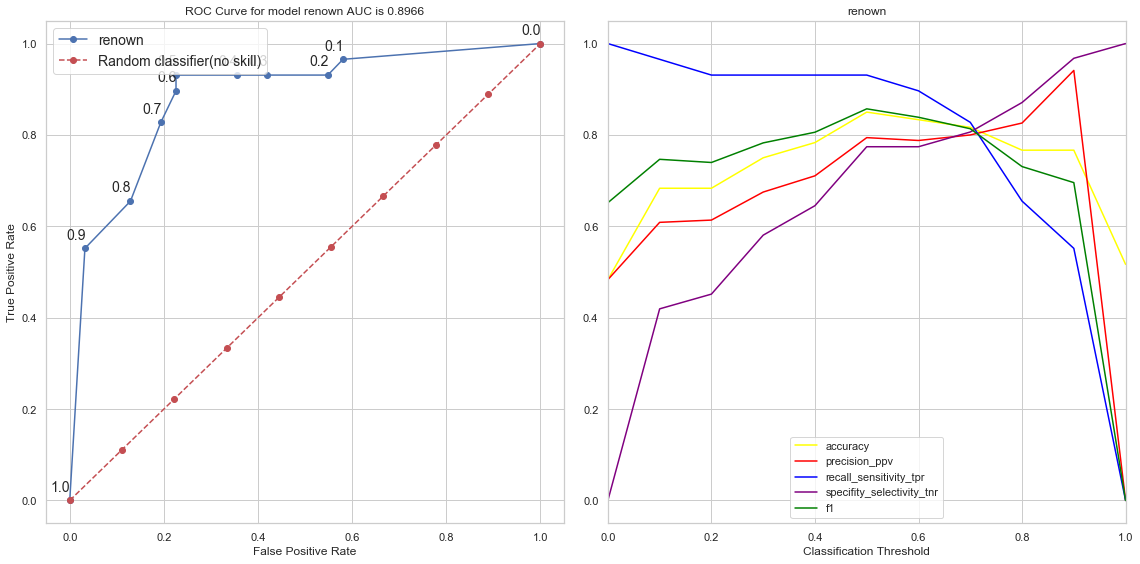

The best of each evaluation metric for model renown
* Precision:  0.9411764705882353 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.8571428571428571 at threshold  0.5



'dict_opt_f1_threshold'

{'civic': 0.5,
 'domestic': 0.1,
 'green': 0.1,
 'industrial': 0.2,
 'inspired': 0.7,
 'market': 0.5,
 'project': 0.4,
 'renown': 0.5}

'AUC'

{'civic': 0.9062,
 'domestic': 0.8904,
 'green': 0.9821,
 'industrial': 0.9159,
 'inspired': 0.7749,
 'market': 0.8819,
 'project': 0.8737,
 'renown': 0.8966}

<Figure size 432x288 with 0 Axes>

In [540]:
#Generate a list of 100 possible tresholds between 0 and .96, 
# AF why .96?
#thresholds = np.linspace(0,0.96,100)
#thresholds = np.linspace(0,1,10)
#AF: We could evaluate thresholds from 0.0 to 1.0 in increments of 0.1?
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
tn_list = []
fp_list = [] 
fn_list = []
tp_list = []

_conventions_matches_precissions = {}
dict_opt_f1_threshold = {}
dict_opt_precision_threshold = {}
dict_opt_recall_threshold = {}
dict_roc_auc = {}

ir = IsotonicRegression()
# AF: at each step calculating the precision, recall, F1, and location on the ROC curve. 
#For each convention
for k in _DLModels.keys():
    tn_list = []
    fp_list = [] 
    fn_list = []
    tp_list = []
    
    
    tmp_precissions = []
    #get the model, the validation data input(my_data_x) and the predicted label(preds) to compare to the actual label(my_data_y).
    my_model = _DLModels[k]
    my_data_x = _DLData_val_x[k]
    my_data_y = [int(x[0]<x[1]) for x in _DLData_val_y[k]]
    preds = my_model.predict(my_data_x)


    dict_roc_auc[k] = roc_auc_score(my_data_y , get_positive_preds_probabilities(preds)).round(4)
    
    for t in thresholds:
        y_pred = get_positive_preds_with_threshold(preds,t)
        tmp_precissions.append(metrics.precision_score(my_data_y, y_pred))
        confusion_matrix = metrics.confusion_matrix(my_data_y, y_pred)
        tn, fp, fn, tp = confusion_matrix.ravel()
        tn_list.append(tn)
        fp_list.append(fp)
        fn_list.append(fn)
        tp_list.append(tp)
    #a dictionary of precisions for each convention(k) for each of the possible tresholds
    _conventions_matches_precissions[k] = tmp_precissions
    print ("")
    display (HTML("<font color = green><h3><left>*** " + k + "***</left></h3></font>"))
    results_for_current_convention = pd.DataFrame({'threshold': thresholds,
                        'tp': tp_list,
                        'fp': fp_list,
                        'tn': tn_list,
                        'fn': fn_list
                       })
   
    metrics_df =  calculate_metrics(results_for_current_convention, len(my_data_y), k);
    print("Metrics for " +k + " per Classification Threshold")
    display(metrics_df)
    
    
    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    plt.style.use('seaborn-dark-palette')
    my_thresholds = [str(t) for t in metrics_df['threshold']]
    plt.plot(metrics_df['fpr'], metrics_df['tpr'], 'bo-', label = k);
    plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'Random classifier(no skill)');
    for x, y, s in zip(metrics_df['fpr'], metrics_df['tpr'], my_thresholds):
        plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});
    plt.legend(prop={'size':14})
    plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate');
    plt.title('ROC Curve for model '+k + " AUC is " + str(dict_roc_auc[k]))
    #plt.show()
    #plt.clf()
    
    plt.subplot(1, 2, 2)
    ax = plt.gca()
    plt.title(k)
    metrics_df.plot(kind='line',x='threshold',y='accuracy', color='yellow',ax=ax)
    metrics_df.plot(kind='line',x='threshold',y='precision_ppv', color='red', ax=ax)
    metrics_df.plot(kind='line',x='threshold',y='recall_sensitivity_tpr', color='blue',ax=ax)
    metrics_df.plot(kind='line',x='threshold',y='specifity_selectivity_tnr', color='purple',ax=ax)
    metrics_df.plot(kind='line',x='threshold',y='f1', color='green', ax=ax)
    plt.xlabel('Classification Threshold')
    plt.tight_layout()
    plt.show()
    plt.clf()
    print ("The best of each evaluation metric for model", k)

    best = metrics_df[['recall_sensitivity_tpr','precision_ppv', 'f1']].max()
    try:
        best_precision_threshold = metrics_df[['threshold']][metrics_df.precision_ppv == best[1]]['threshold'].iloc[0]
    except:
        best_precision_threshold = metrics_df[['threshold']][metrics_df.precision_ppv == best[1]]['threshold'].iloc[0] 
    
    try:
         best_recall_threshold = metrics_df[['threshold']][metrics_df.recall_sensitivity_tpr == best[0]]['threshold'].iloc[0]     
    except:
        best_recall_threshold = metrics_df[['threshold']][metrics_df.recall_sensitivity_tpr == best[0]]['threshold'].iloc[0] 
    
    try:
        best_F1_threshold = metrics_df[['threshold']][metrics_df.f1 == best[2]]['threshold'].iloc[0] 
    except:
         best_F1_threshold = metrics_df[['threshold']][metrics_df.f1 == best[2]]['threshold'].iloc[0] 
   
    dict_opt_f1_threshold[k] = best_F1_threshold
    dict_opt_precision_threshold[k] = best_precision_threshold
    dict_opt_recall_threshold[k]  =  best_recall_threshold
    print ("* Precision: ", best [1], "at threshold ", best_precision_threshold)
    print ("* Recall: ", best [0], "at threshold ", best_recall_threshold)
    print ("* F1: ", best [2], "at threshold ", best_F1_threshold)

gc.collect()

print ("")
display ("dict_opt_f1_threshold", dict_opt_f1_threshold)
print ("")
print ("")
display ("AUC", dict_roc_auc)

# Now use the optimal F1 thresholds to obtain the metrics for the final models
to get the predictions for each model with optimal F1 classification threshold set.
    * Note: If correctly identifying positives is important for us, then we should choose a model with higher Recall/Sensitivity. However, if correctly identifying negatives is more important, then we should choose higher precision/specificity as the measurement metric. We have chosen here the F1 metric which is a balance between the two

In [429]:
result_for_all_conventions = pd.DataFrame(columns=['convention','tp','fp','tn','fn'])
count = 0
for k in _DLModels.keys():

    tn_dict = {}
    fp_dict = {} 
    fn_dict = {}
    tp_dict = {}

    
    my_model = _DLModels[k]
    my_data_x = _DLData_val_x[k]
    my_data_y = [int(x[0]<x[1]) for x in _DLData_val_y[k]]
    preds = my_model.predict(my_data_x)
    model_threshold = dict_opt_f1_threshold[k]
    y_pred = get_positive_preds_with_threshold(preds,model_threshold)
    confusion_matrix = metrics.confusion_matrix(my_data_y, y_pred)
    #print(metrics.classification_report(my_data_y, y_pred, digits=3)) #used it to compare metrics.
    
    tn, fp, fn, tp = confusion_matrix.ravel()
    
    tn_dict[k] = tn
    fp_dict[k] = fp
    fn_dict[k] = fn
    tp_dict[k] = tp
    #a selection of metrics  in dictionary format for each convention(k) 
    result_df = pd.DataFrame({'convention': k,
                              'tp': tp,
                              'fp': fp,
                              'tn': tn,
                              'fn': fn,
                              'auc':dict_roc_auc[k]}, index=[count])
    result_for_all_conventions = pd.concat([result_for_all_conventions,result_df], sort = False)
    count = count+1
result_for_all_conventions = result_for_all_conventions.reset_index(drop=False)
final_models_metrics = calculate_final_models_metrics(result_for_all_conventions)
display (HTML("<font color = green><h3><left>Evaluation Metrics summary per model</left></h3></font>"))
display("Using Probability/Classification Threshold based on F1 optimization", dict_opt_f1_threshold)
display (final_models_metrics)

gc.collect()


'Using Probability/Classification Threshold based on F1 optimization'

{'civic': 0.5,
 'domestic': 0.1,
 'green': 0.1,
 'industrial': 0.2,
 'inspired': 0.7,
 'market': 0.5,
 'project': 0.4,
 'renown': 0.5}

,index,convention,tp,fp,tn,fn,auc,accuracy,precision_ppv,recall_sensitivity_tpr,f1,specifity_selectivity_tnr,tpr,fpr
0,0,civic,38,6,41,6,0.9062,0.868132,0.863636,0.863636,0.863636,0.87234,0.863636,0.12766
1,1,domestic,31,12,27,2,0.8904,0.805556,0.72093,0.939394,0.815789,0.692308,0.939394,0.307692
2,2,green,148,6,148,11,0.9821,0.945687,0.961039,0.930818,0.945687,0.961039,0.930818,0.038961
3,3,industrial,115,26,108,10,0.9159,0.861004,0.815603,0.92,0.864662,0.80597,0.92,0.19403
4,4,inspired,21,10,26,8,0.7749,0.723077,0.677419,0.724138,0.7,0.722222,0.724138,0.277778
5,5,market,42,10,46,12,0.8819,0.8,0.807692,0.777778,0.792453,0.821429,0.777778,0.178571
6,6,project,64,14,42,6,0.8737,0.84127,0.820513,0.914286,0.864865,0.75,0.914286,0.25
7,7,renown,27,7,24,2,0.8966,0.85,0.794118,0.931034,0.857143,0.774194,0.931034,0.225806


191

In [ ]:
https://ecmlpkdd2019.org/downloads/paper/391.pdf
    
There are two types of confidence scores in BR: the confidence of an individual label prediction p(yl|x), 
and the confidence of the entire predicted set p(y|x). 

The individual label scores should be calibrated, which can be easily achieved with 
established univariate calibration procedures such as isotonic regression or Platt scaling.
"In machine learning, Platt scaling or Platt calibration is a way of transforming the outputs of a classification
model into a probability distribution over classes. The method was invented by John Platt in the context of 
support vector machines,[1] replacing an earlier method by Vapnik, but can be applied to other classification 
models.[2] Platt scaling works by fitting a logistic regression model to a classifier's scores." 
isotonic regression has been shown to work better than Platt scaling, in particular when enough training data 
is available (which is not the case here).

then we should be concerned with the set confidence calibration; note that calibrating all individual label confidence
scores does not automatically calibrate set prediction confidence score.



# Evaluation Metrics for over all asystem
in multi-label classification, a misclassification is no longer a hard wrong or right. 
A prediction containing a subset of the actual classes should be considered 
better than a prediction that contains none of them, i.e., predicting two 
of the three labels correctly is better than predicting no labels at all. The following metrics can be used
   * Micro-averaging & Macro-averaging (Label based measures):
   * Hamming-Loss (Example based measure):
   * Exact Match Ratio (Subset accuracy):
   
   
mean column-wise ROC AUC. In other words, the score is the average of the individual AUCs of each predicted column.

In [ ]:
print(metrics.classification_report(my_data_y, y_pred, digits=3))

In [ ]:
#Plot the precision v's the classification treshold. This is plotting at which threshold each classifier 
#meets a minimum precision score. 

plt.figure(figsize=(10,7))

precissions_threshold = 0.8
F1_threshold = 0.8
classifier_thresholds = {}

for k in _conventions_matches_precissions:
    x = thresholds
    y = np.array(_conventions_matches_precissions[k])
    plt.plot(x,y, marker='', linewidth=2, linestyle='dashed', label=k.capitalize()+" model")
    t_index=None
    try:
        t_index = np.argwhere(y > precissions_threshold)[0]
    except:
        pass    
    if t_index is not None:
        classifier_thresholds[k] = x[t_index[0]]

#plt.title("Comparing precission scores for all classifiers", fontdict={'fontsize':20}, pad=25)
plt.xlabel("Confidence threshold ($T_{calibration}$)", fontsize=14)
plt.ylabel("Precision score", fontsize=14)
plt.hlines(y=precissions_threshold, xmin=0, xmax=1.00001, color='black', linestyle=":", lw=4, label="$T_{precision}$")

"""plt.legend([x.replace("training_", "").replace(".txt", "")+" model"
            for x in list(_conventions_matches_precissions.keys())], fontsize=15)
"""

plt.legend(fontsize=15, bbox_to_anchor=(1.01, 1.01))

plt.show()
plt.clf()
gc.collect()
display("Precision Thresholds:", classifier_thresholds)


# https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
# AF:  whert is the equalized_precisions_threshold set?

In [449]:
k = "green"
model = _DLModels[k]
x_val = _DLData_val_x[k]
y_val = _DLData_val_y[k][:,1]
threshold = dict_opt_f1_threshold[k]

pred = model.predict(x_val)[:,1]

y_pred = apply_pred_threshold(pred, threshold)
print (roc_auc_score(y_val, pred))


0.9821326472269868


In [71]:
def train_models_and_get_scores(df, t_calibration, N_executions=1):
    accs = {}
    precs = {}
    AUCs = {}
    for i in tqdm.tqdm(range(N_executions)):
    
        _DLModels, _DLTokenizers, _DLData_val_x, _DLData_val_y, _DLTrain_histories = model_helpers.train_DL_models(df,
                    data_class_column="convention", 
                    data_label_column="label",
                    tokenizer=extended_tokenizer,
                    random_seed=0,
                    use_validation=True) 

        for k in _DLModels.keys():
            model = _DLModels[k]
            x_val = _DLData_val_x[k]
            y_val = _DLData_val_y[k][:,1]

            pred = model.predict(x_val)[:,1]
            y_pred = apply_pred_threshold(pred, t_calibration)



            if k in accs:
                accs[k].append(accuracy_score(y_val, y_pred))
                precs[k].append(precision_score(y_val, y_pred))
                AUCs[k].append(roc_auc_score(y_val, y_pred))
            else:
                accs[k] = [accuracy_score(y_val, y_pred)]
                precs[k] = [precision_score(y_val, y_pred)]
                AUCs[k] = [roc_auc_score(y_val, y_pred)]
        
    return accs, precs, AUCs
    

In [72]:
accs, precs, AUCs = train_models_and_get_scores(training_df, equalized_precisions_threshold)

  0%|          | 0/1 [00:00<?, ?it/s]

Found 83025 unique tokens.
----------------------------------------------------------------
            domestic                  
----------------------------------------------------------------
Shape of data tensor: (364, 32)
Shape of label tensor: (364, 2)

Number of elements from each class in traing and validation set 
[144. 148.]
[38. 34.]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_69"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_69 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_69 (Embedding)        (None, 32, 100)      8302600     input_69[0][0]                   
__________________________________________________________________________________________________
conv1d_273 (Conv1D)             (None, 30, 128)      38528       embedding_69[0][0]               
__________________________________________________________________________________________________
conv1d_274 (Conv1D)             (None, 29, 128)      51328       embedding_69[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_70"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_70 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_70 (Embedding)        (None, 32, 100)      8302600     input_70[0][0]                   
__________________________________________________________________________________________________
conv1d_277 (Conv1D)             (None, 30, 128)      38528       embedding_70[0][0]               
__________________________________________________________________________________________________
conv1d_278 (Conv1D)             (None, 29, 128)      51328       embedding_70[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_71"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_71 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_71 (Embedding)        (None, 32, 100)      8302600     input_71[0][0]                   
__________________________________________________________________________________________________
conv1d_281 (Conv1D)             (None, 30, 128)      38528       embedding_71[0][0]               
__________________________________________________________________________________________________
conv1d_282 (Conv1D)             (None, 29, 128)      51328       embedding_71[0][0]               
_________________________________

KeyboardInterrupt: 

In [ ]:
print("Models performance on unseen data:\n\n")
custom_ordered_keys = ["industrial", "project", "market", "inspired", "civic", "domestic", "green", "renown"]
for k in custom_ordered_keys:
    avg_acc = "%.3f" % np.mean(accs[k])
    avg_auc = "%.3f" % np.mean(AUCs[k])
    avg_prec = "%.3f" % np.mean(precs[k])
    
    print("{} & {}  & {} & {}\\".format(k, avg_acc, avg_prec, avg_auc))
    print("\hline")
  

In [145]:
def compute_confusions(conv, models_, training_x, training_y, calibration_threshold=0.656):
    matches = [0] * len(classifier_thresholds.keys())
    
    #print(training_y[conv][:,1])
    #print(np.argwhere(training_y[conv][:,1]==1))
    
    sentences = training_x[conv][np.argwhere(training_y[conv][:,1]==1)]
    
    shape = sentences.shape
    sentences = sentences.reshape(shape[0], shape[2])
    sent_length = len(sentences)
    
    
    for idx, k in enumerate(classifier_thresholds.keys()):
        
        print(sentences.shape)
        pred = models_[k].predict(sentences, verbose=0)


        pred = np.array(pred)

        matches[idx] = (pred[pred[:,1]> classifier_thresholds[k]]).sum()
    
        
    return matches, sent_length

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          class_lengths = None):
    
    #print(cm)
    if normalize:
        if class_lengths:
            cm = cm.astype('float') / np.array(class_lengths)[:, np.newaxis]
        else:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass
    print(np.sum(cm[:,1]))
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix \n Accuracy: "%.5f"' % np.mean(cm.diagonal()) 
        else:
            title = 'Confusion matrix, without normalization \n Accuracy: "%.5f"' % np.mean(cm.diagonal()) 
            
    classes = [c.capitalize() for c in classes]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    ax.set_ylim(cm.shape[0]-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    
    #thresh = 0.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    #color=cm[i,j])
                    color="white" if cm[i, j] > thresh else "black")
    
    #fig.tight_layout()
    return ax

In [146]:
y_true = []
y_pred = []

conf_matrix = []
class_lengths = []


for idx, k in enumerate(list(classifier_thresholds.keys())):

    print(" -- {}     ".format(k))


    matches, cl_len = compute_confusions(k, _DLModels, _DLData_val_x, _DLData_val_y)
    
    conf_matrix.append(matches)
    
    class_lengths.append(cl_len)

conf_matrix = np.array(conf_matrix)

 -- domestic     
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
 -- civic     
(46, 32)
(46, 32)
(46, 32)
(46, 32)
(46, 32)
(46, 32)
(46, 32)
 -- project     
(69, 32)
(69, 32)
(69, 32)
(69, 32)
(69, 32)
(69, 32)
(69, 32)
 -- inspired     
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
 -- green     
(158, 32)
(158, 32)
(158, 32)
(158, 32)
(158, 32)
(158, 32)
(158, 32)
 -- market     
(60, 32)
(60, 32)
(60, 32)
(60, 32)
(60, 32)
(60, 32)
(60, 32)
 -- industrial     
(127, 32)
(127, 32)
(127, 32)
(127, 32)
(127, 32)
(127, 32)
(127, 32)


1.9701788870809875


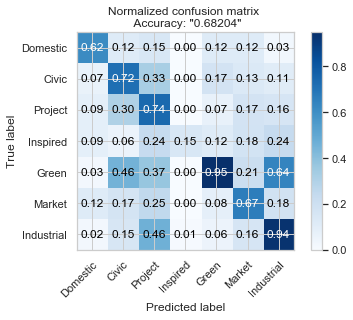

In [147]:
class_names = list(classifier_thresholds.keys())

plot_confusion_matrix(conf_matrix, class_names, normalize=True, class_lengths = class_lengths)

In [91]:
conf_matrix

array([[ 23.,  15.,  18.,   4.,  13.,  12.,  14.,   0.],
       [ 16.,  36.,  24.,   5.,  21.,  17.,  17.,   0.],
       [ 23.,  34.,  56.,  12.,  13.,  17.,  21.,   0.],
       [ 11.,   6.,  17.,   5.,  10.,  13.,  22.,   0.],
       [ 39., 102., 116.,  13., 166.,  75., 174.,   0.],
       [ 10.,  23.,  43.,   6.,  15.,  44.,  37.,   0.],
       [ 54.,  61.,  94.,  14.,  15.,  62., 132.,   0.]])

## Matches histograms

In [114]:
def plot_matches_histogram_multiclass(_matches, _models, title=None, data_sources=[]):

    f, ax = plt.subplots(figsize=[12,6])
    
    elems = [k.replace("training_", "").replace(".txt", "").capitalize()  for k in list(_models.keys())]

    
    barWidth = 0.25  # the width of the bars
    # Set position of bar on X axis
    r1 = np.arange(len(elems))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    rs = [r1,r2,r3]


    
    for m_idx, m in enumerate(_matches):
        f = np.array(m).sum(axis=0)
        f = f / np.sum(f)
        
        print(f)
        print(r1)

        plt.bar(rs[m_idx], f, width=barWidth, edgecolor='white', label=data_sources[m_idx])
        
    # Add xticks on the middle of the group bars
    plt.xlabel('Conventions', fontweight='bold')
    plt.ylabel('Percentage', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(elems))], elems)
    plt.legend()
    plt.show()

In [96]:
def get_model_matches(sequences, model):
    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    preds = model.predict(data)

    return preds

In [77]:
def count_positive_preds(preds):
    count = 0
    for j in range(len(preds)):
    
        count += int(preds[j][1]>preds[j][0])
    return count

In [78]:
def count_positive_preds_with_threshold(preds, threshold=0.5):
    count = 0
    for j in range(len(preds)):
    
        count += int(preds[j][1]>=threshold)
    return count

In [79]:
def calculate_matches(repositories_descriptions, _models, _tokenizers, model_preds_func=count_positive_preds, threshold=None):
    _repos_matches = []

    ##Â Counting number of matches per model for each repo
    for r_description in repositories_descriptions:
        r_description = r_description.split("\n")

        this_repo_matches = []
        for model_key in _models.keys():
            matches=0

            tokenized_r_description = _tokenizers[model_key].texts_to_sequences(r_description)

            preds = get_model_matches(tokenized_r_description, _models[model_key])

            if threshold is None:
                num_matches = model_preds_func(preds)
            else:
                num_matches = model_preds_func(preds, threshold)

            this_repo_matches.append(num_matches)

        _repos_matches.append(this_repo_matches)
        
    return _repos_matches
    

# Analyzing the Github and Semantic Scholar data

In [120]:
AI_repos = pd.read_csv("Data/ToBeAnalyzed/github_AI_repos_dump.csv", sep=";")
not_AI_repos = pd.read_csv("Data/ToBeAnalyzed/github_non_AI_repos_dump.csv")

In [121]:
not_AI_repos.head()

,Unnamed: 0,repo_name,repo_creation_date,repo_last_update,repo_id,repo_language,repo_owner,repo_topics,repo_num_stars,repo_num_subscribers,repo_raw_description,repo_num_forks,repo_num_open_issue,repo_size,cleaned_descriptions,similar_to
0,0,facebook/react,2013-05-24 16:15:54,NaN,10270250,JavaScript,"NamedUser(login=""facebook"")","['javascript', 'react', 'frontend', 'declarati...",136712,6607,b'# [react](https://reactjs.org/) &middot; [![...,25764,796,NaN,b react react is a javascript library for buil...,tensorflow/tensorflow
1,1,ossu/computer-science,2014-05-04 00:18:39,NaN,19415064,NaN,"NamedUser(login=""ossu"")","['computer-science', 'awesome-list', 'courses']",46132,3028,b'![open source society university (ossu)](htt...,6622,29,NaN,b open source society university path to a fre...,keras-team/keras
2,2,jekyll/jekyll,2008-10-20 06:29:03,NaN,65252,Ruby,"NamedUser(login=""jekyll"")","['ruby', 'jekyll', 'static-site-generator', 'b...",38760,1462,b'# [jekyll](https://jekyllrb.com/)\n\n[![gem ...,8462,138,NaN,b jekyll ruby-gems travis appveyor codeclimate...,scikit-learn/scikit-learn
3,3,nodejs/node-v0.x-archive,2009-05-27 16:29:46,NaN,211666,NaN,"NamedUser(login=""nodejs"")",[],35388,2173,b'\nthis repository is an archive of node.js b...,7765,571,NaN,b this repository is an archive of node.js bef...,aymericdamien/TensorFlow-Examples
4,4,vsouza/awesome-ios,2014-07-10 16:03:45,NaN,21700699,Swift,"NamedUser(login=""vsouza"")","['awesome', 'swift-library', 'swift-extensions...",33027,1788,"b'<img src=""https://github.com/vsouza/awesome-...",5563,5,NaN,b abouta curated list of awesome ios framework...,pytorch/pytorch


In [15]:
MAX_SEQUENCE_LENGTH=32

In [123]:
AI_texts = AI_repos['cleaned_descriptions'].values

#AI_texts =[t.split("\n") for t in AI_texts]
AI_repos_matches = calculate_matches(AI_texts, 
                                     models[0][0], 
                                    models[0][1],
                                    model_preds_func=count_positive_preds_with_threshold, 
                                    threshold = 0.656) ##As obtained above!



In [124]:
not_AI_texts = not_AI_repos['cleaned_descriptions'].values
not_AI_repos_matches = calculate_matches(not_AI_texts, 
                                     models[0][0], 
                                    models[0][1],
                                    model_preds_func=count_positive_preds_with_threshold, 
                                    threshold = 0.656) ##As obtained above!



In [ ]:
S2_texts = []
with open("Data/ToBeAnalyzed/s2_random_3345_nn.txt", "rb") as f:
    S2_texts = f.readlines()
    f.close()
S2_texts = [str(s) for s in S2_texts]
    
S2_matches = calculate_matches(S2_texts, 
                                     models[0][0], 
                                    models[0][1],
                                    model_preds_func=count_positive_preds_with_threshold, 
                                    threshold = 0.656) ##As obtained above!




[0.06951143 0.03326595 0.24418328 0.09338085 0.00307895 0.09783359
 0.3643679  0.09437805]
[0 1 2 3 4 5 6 7]
[0.09722348 0.03550687 0.23687746 0.06382753 0.00152511 0.14390106
 0.32328879 0.09784969]
[0 1 2 3 4 5 6 7]
[0.04166128 0.0663734  0.20494242 0.05873981 0.03118127 0.04217881
 0.37068185 0.18424117]
[0 1 2 3 4 5 6 7]


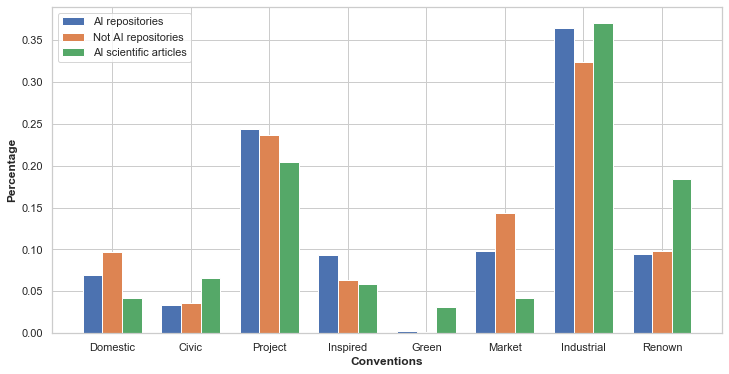

In [277]:
data_sources = ['AI repositories', 'Not AI repositories', 'AI scientific articles']
plot_matches_histogram_multiclass([AI_repos_matches, not_AI_repos_matches, S2_matches], models[0][0], "Conventions for not AI research articles", data_sources)

In [126]:
print(len(AI_repos))
print(len(not_AI_repos))okay

8609
5358


In [135]:
ai_sents = []
for t in AI_repos['cleaned_descriptions'].values:
    for term in t.split("\n"):
        ai_sents.append(str(term))
len(ai_sents)

138085

In [136]:
not_ai_sents = []
for t in not_AI_repos['cleaned_descriptions'].values:
    for term in t.split("\n"):
        not_ai_sents.append(str(term))
len(not_ai_sents)

76274

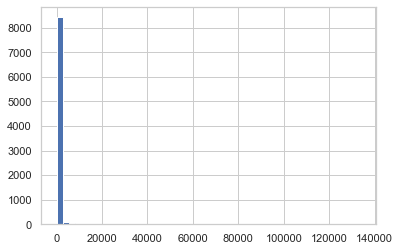

In [141]:
AI_repos['repo_num_stars'].hist(bins=50)

In [142]:
np.mean(AI_repos['repo_num_stars'])

271.43489371587873

In [145]:
np.mean(not_AI_repos['repo_num_stars'])

453.5194102276969

In [143]:
np.max(AI_repos['repo_num_stars'])

133935

In [144]:
np.mean(AI_repos['repo_num_stars'])

271.43489371587873

In [147]:
AI_repos.head()

,repo_name,repo_creation_date,repo_last_update,repo_id,repo_language,repo_owner,repo_topics,repo_num_stars,repo_num_subscribers,repo_raw_description,repo_num_forks,repo_num_open_issue,repo_size,cleaned_descriptions
0,tensorflow/tensorflow,2015-11-07 01:19:20,2015-11-07 01:19:20,45717250,C++,"NamedUser(login=""tensorflow"")","['tensorflow', 'machine-learning', 'python', '...",133935,8585,"b'<div align=""center"">\n <img src=""https://ww...",77239,2672,398370,b documentation tensorflow is an end-to-end o...
1,keras-team/keras,2015-03-28 00:35:42,2015-03-28 00:35:42,33015583,Python,"NamedUser(login=""keras-team"")","['deep-learning', 'tensorflow', 'neural-networ...",44041,2065,b'\xef\xbb\xbf# keras: deep learning for human...,16755,2538,13239,b keras deep learning for humans you have just...
2,scikit-learn/scikit-learn,2010-08-17 09:43:38,2010-08-17 09:43:38,843222,Python,"NamedUser(login=""scikit-learn"")","['machine-learning', 'python', 'statistics', '...",36964,2270,b'.. -*- mode: rst -*-\n\n|azure|_ |travis|_ |...,18180,1939,107837,b .. mode rst azure travis codecov circleci ...
3,aymericdamien/TensorFlow-Examples,2015-11-11 14:21:19,2015-11-11 14:21:19,45986162,Jupyter Notebook,"NamedUser(login=""aymericdamien"")","['tensorflow', 'tutorial', 'examples', 'deep-l...",33929,2054,b'# tensorflow examples\n\nthis tutorial was d...,12813,180,9552,b tensorflow examplesthis tutorial was designe...
4,pytorch/pytorch,2016-08-13 05:26:41,2016-08-13 05:26:41,65600975,C++,"NamedUser(login=""pytorch"")","['neural-network', 'autograd', 'gpu', 'numpy',...",31533,1325,b'![pytorch logo](https://github.com/pytorch/p...,7758,4090,205280,b pytorch is a python package that provides tw...


In [149]:
AI_repos['repo_language'].mode()

0    Python
dtype: object

In [150]:
not_AI_repos['repo_language'].mode()

0    JavaScript
dtype: object

In [153]:
len(AI_repos[AI_repos['repo_language'] == 'Python']) / len(AI_repos)

0.3897084446509467

In [152]:
len(not_AI_repos[not_AI_repos['repo_language'] == 'JavaScript']) / len(not_AI_repos)

0.255692422545726

# Get a list of keywords per convention from the Training data

In [337]:
#Read the combined original training data and audited data file from "training_ALL.tsv"
#Note this method already calls "remove_line_breaks"
USE_GIT_HUB = True

print (paths.TRAINING_DATA_ALL_DIR_FILE_GIT)
print (paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL)

#Note this method already calls "remove_line_breaks"
training_df = model_helpers.get_training_data(
                            USE_GIT_HUB,
                            paths.TRAINING_DATA_ALL_DIR_FILE_GIT,
                            paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL, 
                            paths.GIT_OWNER,
                            paths.GIT_REPO)

display (training_df.head())

for c in training_df['convention'].unique():
    print(c)
    print("number of sentences", len(training_df[training_df['convention'] == c]))
    print("number of sentences in class 1",len(training_df[ (training_df['convention'] == c) & (training_df['label'] == 1)]))
    print()

In [345]:
#AF: to generate the keywords we must use only the data from training data where label = 1
custom_ordered_keys = ["industrial", "project", "market", "inspired", "civic", "domestic", "green", "renown"]
docs = []

for c in custom_ordered_keys:
    #docs.append("\n".join(list(training_df[training_df['convention'] == c]['text'].values)))
    docs.append("\n".join(list(training_df[ (training_df['convention'] == c) & (training_df['label'] == 1)]['text'].values)))

In [ ]:
#AF: https://gist.github.com/sebleier/554280
stopwords = parsing_helpers.get_stop_words(paths.STOP_WORDS_DIR_FILE_LOCAL)

stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", "before", "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", "having", "he", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"]

In [389]:
#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)
print (cv)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

MIN_TFIDF_SCORE = 0.05

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10, min_score=MIN_TFIDF_SCORE):
    """get the feature names and tf-idf score of top n items"""
    #use only items with > min score
    sorted_items = [[idx, score] for idx,score in sorted_items if score>=min_score]
    
    #return only top n items
    if len(sorted_items) > topn:
        sorted_items = sorted_items[:topn]
        
    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.85, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['0o', '0s', '3a', '3b', '3d', '6b', '6o', 'a', 'A',
                            'a1', 'a2', 'a3', 'a4', 'ab', 'able', 'about',
                            'above', 'abst', 'ac', 'accordance', 'according',
                            'accordingly', 'across', 'act', 'actually', 'ad',
                            'added', 'adj', 'ae', 'af', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [388]:
# you only needs to do this once
feature_names=cv.get_feature_names()


# get the document that we want to extract keywords from
for doc_idx, doc in enumerate(docs):
    print("=====================================")
    print("         {}                   ".format(custom_ordered_keys[doc_idx]))
    print("=====================================")
    
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 30
    keywords=extract_topn_from_vector(feature_names, sorted_items, 30, MIN_TFIDF_SCORE)
    print(keywords)
          

display (HTML("<font color = green><h3><left>***Top 5 Keywords from training data for paper Results***</left></h3></font>"))
for doc_idx, doc in enumerate(docs):
    print("=====================================")
    print("         {}                   ".format(custom_ordered_keys[doc_idx]))
    print("=====================================")
    

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    
    #Extract the top 5 for the paper Results
    keywords=extract_topn_from_vector(feature_names,sorted_items, 5, MIN_TFIDF_SCORE)
    print(keywords)
       

         industrial                   
{'performance': 0.367, 'standard': 0.218, 'reliable': 0.199, 'tests': 0.182, 'control': 0.164, 'efficiency': 0.155, 'functionality': 0.143, 'benchmark': 0.143, 'output': 0.126, 'benchmarks': 0.119, 'functional': 0.1, 'python': 0.097, 'load': 0.095, 'training': 0.091, 'measure': 0.091, 'running': 0.09, 'learning': 0.09, 'applications': 0.09, 'production': 0.086, 'memory': 0.084, 'code': 0.083, 'function': 0.08, 'software': 0.076, 'set': 0.075, 'functions': 0.073, 'optimization': 0.071, 'system': 0.071, 'scientific': 0.071, 'fast': 0.069, 'progress': 0.067}
         project                   
{'city': 0.317, 'projective': 0.293, 'links': 0.256, 'connections': 0.239, 'projects': 0.195, 'networks': 0.192, 'employability': 0.134, 'activity': 0.13, 'aubrey': 0.122, 'bellenger': 0.11, 'status': 0.108, 'man': 0.104, 'streamlined': 0.085, 'engage': 0.082, 'knows': 0.077, 'condition': 0.077, 'grammar': 0.073, 'connexionist': 0.073, 'engagement': 0.072, 'com

         industrial                   
{'performance': 0.367, 'standard': 0.218, 'reliable': 0.199, 'tests': 0.182, 'control': 0.164}
         project                   
{'city': 0.317, 'projective': 0.293, 'links': 0.256, 'connections': 0.239, 'projects': 0.195}
         market                   
{'business': 0.289, 'customized': 0.288, 'goods': 0.217, 'buy': 0.172, 'competition': 0.155}
         inspired                   
{'inspiration': 0.465, 'inspired': 0.161, 'creative': 0.101, 'unconscious': 0.1, 'imaginary': 0.1}
         civic                   
{'community': 0.439, 'collective': 0.38, 'civic': 0.24, 'interests': 0.164, 'chapter': 0.164}
         domestic                   
{'superiors': 0.223, 'upbringing': 0.183, 'household': 0.183, 'children': 0.176, 'habit': 0.153}
         green                   
{'green': 0.753, 'economy': 0.346, 'growth': 0.281, 'development': 0.164, 'carbon': 0.16}
         renown                   
{'opinion': 0.495, 'press': 0.306, 'fame': 0.192, '

In [ ]:
# now combine the training data keywords with the domain expert keywords.
keyword_from_social_scientists_dict = {
    'industrial': 
        ['efficiency', 'efficiant', 'performance', 'performances', 'productivity', 'productive', 'output', 'outputs', 'control', 'power', 'functionality', 'functional', 'organisation', 'organisations', 'professional', 'professionals', 'profession', 'professions', 'reliability', 'reliable', 'foreseeability', 'qualification', 'qualifications', 'expert', 'experts', 'expertise', 'progress' , 'standard', 'standards', 'standardized', 'norms', 'norm', 'growth', 'quantification', 'quantifiy', 'measurement', 'measure', 'measures', 'engineering', 'engineer', 'forecast', 'linearity', 'extrapolation', 'extrapolate', 'scientific', 'plans', 'plan', 'audit', 'audits', 'benchmark', 'benchmarks', 'benchmarking', 'test', 'tests'],
    'project':
        ['flexibility', 'project', 'projects', 'networking', 'networker', 'networkers', 'activity', 'intermediary', 'mediation', 'switch', 'switching', 'shift', 'shifting', 'mobility', 'dynamic', 'transition', 'transitions', 'temporality', 'fluidity', 'communication', 'communications', 'communicate', 'initiative', 'initiatives', 'bridging', 'adapt', 'adaption', 'adaptions'],
    'market':
        ['wealth', 'money', 'goods', 'rival', 'selfishness', 'winner', 'winners', 'price', 'customer', 'customers', 'customized', 'seller', 'sellers', 'sell', 'vendor', 'vendors', 'buyer', 'buyers', 'buy', 'purchaser', 'purchasers', 'purchase', 'opportunity', 'opportunities', 'competition', 'compete', 'sale', 'sales', 'business', 'interest', 'transaction', 'transactions', 'availability', 'owner', 'owners', 'bargain', 'contract', 'contracts', 'pay', 'deal', 'trade', 'scarcity', 'trading', 'entrepreneur', 'entrepreneurs', 'entrepreneurial', 'market', 'markets', 'marketing', 'marketplace'],
    'inspired':
        ['inspiration', 'illuminated', 'unexpected', 'feeling', 'fascination', 'fascinating', 'thrilling', 'genuineness', 'intuition', 'genius', 'brilliant', 'uniqueness', 'non-conformity', 'non-conform', 'passion', 'passionate', 'creative', 'creativity', 'imagination', 'visionary', 'extraordinary', 'emotional', 'conviction', 'holy', 'gifted', 'blessed'],
    'civic':
        ['collective', 'collectives', 'common good', 'community', 'communities', 'representative', 'representatives', 'general interest', 'unite', 'unity', 'union', 'unions', 'majority', 'civil right', 'civil rights', 'assembly', 'democracy', 'vote', 'votes', 'voting', 'election', 'elections', 'elect', 'equality', 'fair', 'fairness', 'law', 'laws', 'justice', 'unbiased', 'impartial'],
    'domestic':
        ['superior', 'superiority', 'continuity', 'continuation', 'dependence', 'dependency', 'familiarity', 'tradition', 'traditions', 'origins', 'origin', 'routine', 'routines', 'habit', 'habits', 'etiquette', 'common sense', 'respect', 'duty', 'duties', 'trust', 'craft', 'crafts', 'craftsman', 'crafted'],
    'green':
        ['nature', 'ecological', 'ecology', 'renewable', 'recyclable', 'recycle', 'sustainable', 'sustainability', 'preserve', 'preservation', 'holism', 'holistic', 'green', 'emission', 'organic', 'organical'],
    # 'Vitality'
    'renown':
        ['acknowledgement', 'praise', 'public relation', 'public relations', 'public opinion', 'brands', 'brand', 'audience', 'follower', 'followers', 'supporter', 'supporters', 'fame', 'influence', 'influences', 'glory', 'attractive', 'appealing']   
}

# END Keywords

In [185]:
training_df[training_df['convention'] == 'inspired']

,Unnamed: 0,convention,index,label,provenance,text
1431,1985,inspired,1985,1,Manually_gathered,"If you\'re feeling confident, use"
1432,1986,inspired,1986,1,Manually_gathered,you\'re just looking for [some inspiration][in...
1433,1987,inspired,1987,1,Manually_gathered,"if you found this project helpful, any monetar..."
1434,1988,inspired,1988,1,Manually_gathered,the inspiration for mozdef comes from the larg...
1435,1989,inspired,1989,1,Manually_gathered,we want designers to be as creative as possibl...
...,...,...,...,...,...,...
4297,5997,inspired,671,1,Semantic Scholar,Our experiments demonstrate that the models tr...
4298,5998,inspired,672,1,Semantic Scholar,We develop a new learning rule designed around...
4299,5999,inspired,673,1,Semantic Scholar,"In this paper, we propose a novel Web services..."
4300,6000,inspired,674,1,Semantic Scholar,To solve dynamic Sylvester equation in the pre...


In [187]:
for c in training_df['convention'].unique():
    print(c)
    print(len(training_df[training_df['convention'] == c]))
    print()

domestic
364

civic
466

project
630

inspired
346

green
1574

market
578

industrial
1342

renown
308



[0.06951143 0.03326595 0.24418328 0.09338085 0.00307895 0.09783359
 0.3643679  0.09437805]
[0 1 2 3 4 5 6 7]
[0.09722348 0.03550687 0.23687746 0.06382753 0.00152511 0.14390106
 0.32328879 0.09784969]
[0 1 2 3 4 5 6 7]
[0.04166128 0.0663734  0.20494242 0.05873981 0.03118127 0.04217881
 0.37068185 0.18424117]
[0 1 2 3 4 5 6 7]


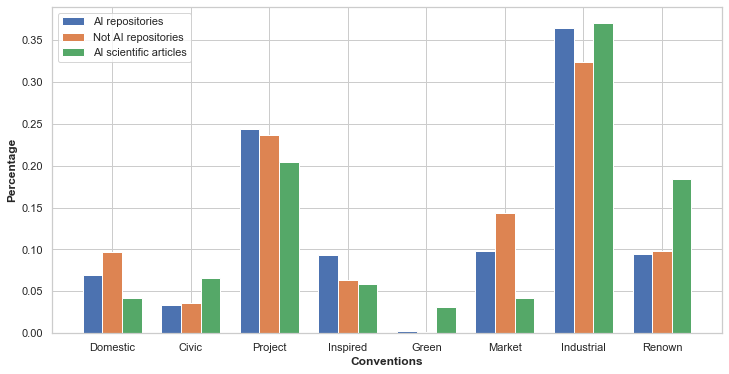

plt.legend([x.replace("training_", "").replace(".txt", "")+" model"
            for x in list(_conventions_matches_precissions.keys())], fontsize=15)



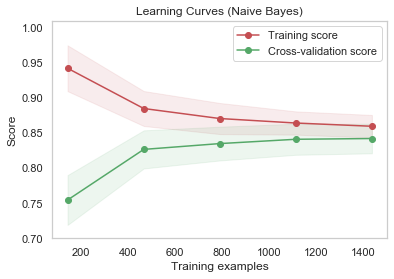

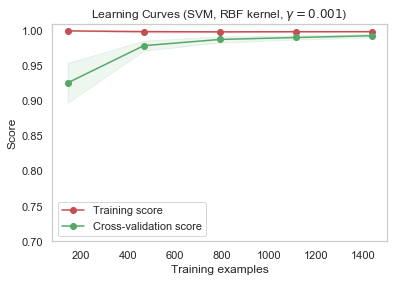

In [19]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier

In [21]:
# Function to create model, required for KerasClassifier
def create_model(epochs=20):
    word_index = extended_tokenizer.word_index
    num_epochs = epochs
    EMBEDDING_DIM=100
    MAX_SEQUENCE_LENGTH=32
    
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False)


    convs = []
    filter_sizes = [3,4,5]

    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    for fsz in filter_sizes:
        l_conv = Conv1D(nb_filter=128,filter_length=fsz,activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)#

    l_cov1= Conv1D(128, 5, activation='relu')(l_merge)
    l_pool1 = MaxPooling1D(5)(l_cov1)

    l_flat = Flatten()(l_pool1)
    l_dense = Dense(128, activation='relu')(l_flat)
    preds = Dense(2, activation='softmax')(l_dense)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['acc'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

In [22]:
np.linspace(.1, 1.0, 2)

array([0.1, 1. ])

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [24]:
training_df['convention'].unique()

array(['domestic', 'civic', 'project', 'inspired', 'green', 'market',
       'industrial', 'renown'], dtype=object)

/usr/local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


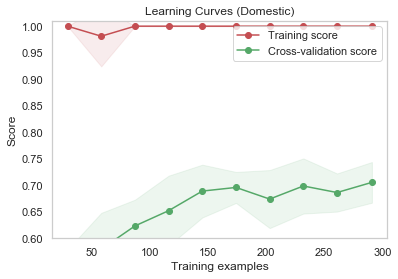

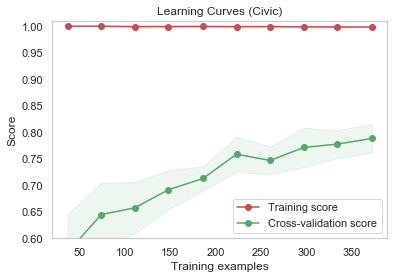

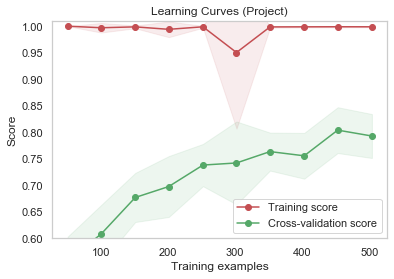

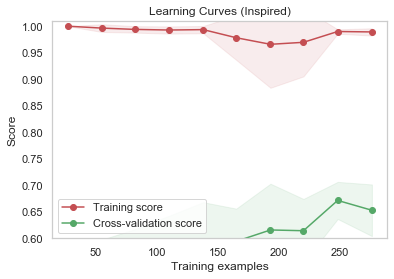

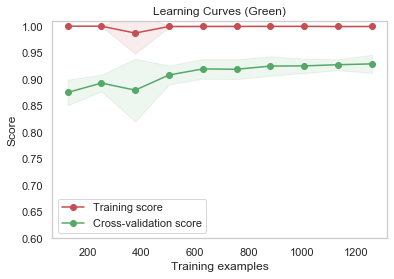

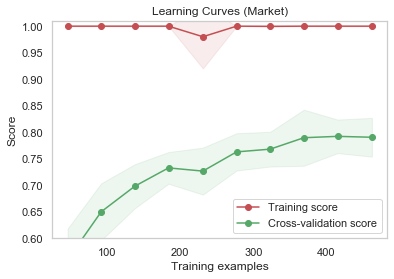

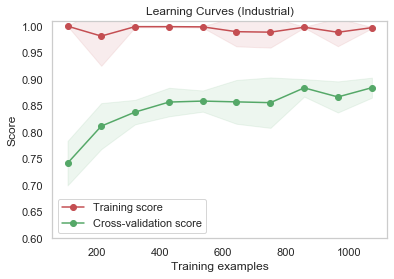

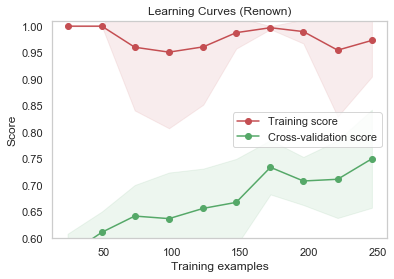

In [25]:
for _conv in training_df['convention'].unique():
    tmp_df_train = training_df[training_df['convention']==_conv]

    texts = tmp_df_train['text'].values
    labels = tmp_df_train['label'].values

    sequences = extended_tokenizer.texts_to_sequences(texts)


    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

    labels = to_categorical(np.asarray(labels))

    X=data
    y=labels

    title = "Learning Curves ({})".format(_conv.capitalize())
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    estimator = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)
    plot_learning_curve(estimator, title, X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)

    plt.show()

In [303]:
data_portions = np.arange(.1, 1.01, 0.10)
print(data_portions)

accs = []

for p in data_portions:
    
    tmp_df_train = training_df[training_df['convention']=='industrial']

    texts = tmp_df_train['text'].values
    labels = tmp_df_train['label'].values

    sequences = extended_tokenizer.texts_to_sequences(texts)


    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

    labels = to_categorical(np.asarray(labels))
    
    selected_indexes = random.choice(list(enumerate(X)))[0]
    
    tmp_x = data[selected_indexes]
    tmp_y = labels[selected_indexes]
    
    
    
    
    

    title = "Learning Curves (Industrial)"
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    #cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)
    
    
    estimator.train(tmp_x)

    
    accs.append(metrics.accuracy_score())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


AttributeError: 'KerasClassifier' object has no attribute 'train'